In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [35]:
print(listdir('raw/'))

['K2ICU_BED01-1472098497.hd5', 'K2ICU_BED18-1447919424.hd5', 'K2ICU_BED25-1458669700.hd5', 'K2ICU_BED17-1509145105.hd5', 'K2ICU_BED09-1438799806.hd5', 'K2ICU_BED32-1487763686.hd5', 'K2ICU_BED13-1497121350.hd5', 'K2ICU_BED07-1493859809.hd5', 'K2ICU_BED01-1485531766.hd5']


In [130]:
store = {}

for raw in listdir('raw/'):
    store[raw] = pd.HDFStore('raw/{0}'.format(raw))

# Through Trial and Error, Good vs. Bad Raw

# Good
# 'K2ICU_BED18-1447919424.hd5' <-- Best of the bunch. Strong Waveforms and Vitals
# 'K2ICU_BED09-1438799806.hd5' <-- Waveform data, not vitals, summary is useless. Waveform data isn't ideal. Poor ecg
# 'K2ICU_BED32-1487763686.hd5' <-- Waveform data (decent) + vitals (poor)

# Bad
# 'K2ICU_BED25-1458669700.hd5' <-- No vitals or waveform data
# 'K2ICU_BED01-1485531766.hd5' <-- just Vital data, nothing else
# 'K2ICU_BED13-1497121350.hd5' <-- just Vital data, decent heart rate data but not much else
# 'K2ICU_BED07-1493859809.hd5' <-- just Vital data
# 'K2ICU_BED17-1509145105.hd5' <-- just Vitals data, SPO2-% the only column with info
# 'K2ICU_BED01-1472098497.hd5' <-- just Vitals data, Decent HR, ARS2-M might be useful

file = 'K2ICU_BED18-1447919424.hd5'

print(store.keys())
print("\n")
print(store[file])

waveforms = store[file].select('Waveforms')
vitals = store[file].select('Vitals')
# summary = store[file].select('Summary')

# waves=store.select('Waveforms')

vitals.head(5)
waveforms.head(5)
# summary.head(100)

dict_keys(['K2ICU_BED18-1447919424.hd5', 'K2ICU_BED25-1458669700.hd5', 'K2ICU_BED01-1485531766.hd5', 'K2ICU_BED13-1497121350.hd5', 'K2ICU_BED07-1493859809.hd5', 'K2ICU_BED09-1438799806.hd5', 'K2ICU_BED32-1487763686.hd5', 'K2ICU_BED17-1509145105.hd5', 'K2ICU_BED01-1472098497.hd5'])


<class 'pandas.io.pytables.HDFStore'>
File path: raw/K2ICU_BED18-1447919424.hd5
/Vitals               frame_table  (typ->appendable,nrows->4627,ncols->10,indexers->[index])   
/Waveforms            frame_table  (typ->appendable,nrows->2217600,ncols->11,indexers->[index])


,AR1,AR2,AR3,I,II,III,V,SPO2,CVP1,CVP2,RR
2015-11-19 02:50:25.000000000,NaN,NaN,NaN,0.029,0.005,-0.017,-0.034,13.299,NaN,NaN,NaN
2015-11-19 02:50:25.004166667,NaN,NaN,NaN,0.022,0.000,-0.022,-0.034,26.598,NaN,NaN,NaN
2015-11-19 02:50:25.008333334,NaN,NaN,NaN,0.022,-0.005,-0.027,-0.039,26.598,NaN,NaN,NaN
2015-11-19 02:50:25.012500001,NaN,NaN,NaN,0.022,-0.020,-0.039,-0.039,39.936,NaN,NaN,NaN
2015-11-19 02:50:25.016666668,NaN,NaN,NaN,0.017,-0.029,-0.044,-0.037,39.936,NaN,NaN,NaN


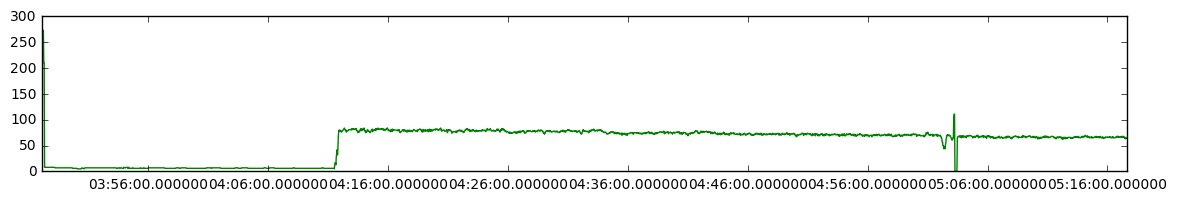

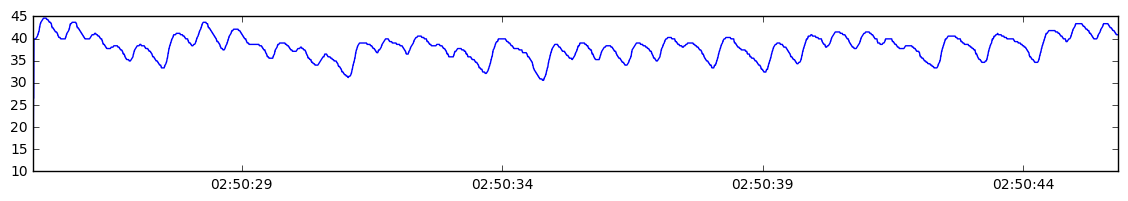

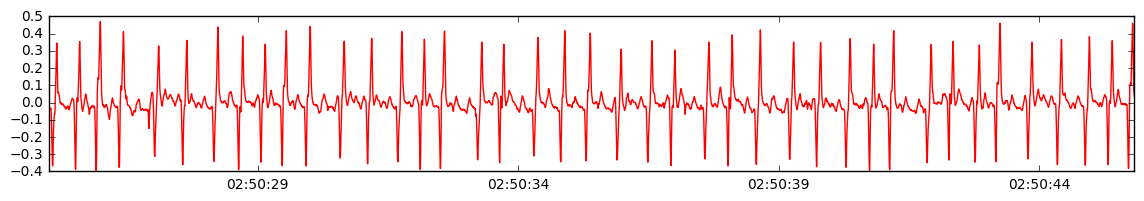

In [138]:
num = 5000

waveform_data = waveforms.head(num)
vitals_data = vitals.head(num)

abp_signal = waveform_data['SPO2']
vitals_signal = vitals_data['AR2-M'] #waveform_data['V']
ecg_signal = waveform_data['V']

plt.figure(num=1, figsize=(14, 2))
plt.plot(vitals_signal, color='green')

plt.figure(num=2, figsize=(14, 2))
plt.plot(abp_signal, color='blue')

plt.figure(num=3, figsize=(14, 2))
plt.plot(ecg_signal, color='red')

plt.show()